## This version of program does the following
- Read the files (either .tiff or .jpg) from the given directory for ONE volume
- ALL the files are read in one go (different from UNC file which read 10 .jpg files in one go)
- The files are from 1898 volume after removing front and back pages
- The files which throw errors and stop the code from running are stored in a seperate csv file, called errors.csv, in the same directory.
- The crop coordinates for other files are stored in another csv (named after the year of the volume) in the same directory.
- Note: Some pages are not cropped but also don't throw errors. Those pages are not stored in the errors.csv file, and are rather stored in the year based csv file.

In [1]:
%run crop_functions_updated_.py

In [2]:
from crop_functions_updated_ import *
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 50]
mod = importlib.reload(sys.modules['crop_functions_updated_'])  
vars().update(mod.__dict__)

In [4]:
dirpath = "/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690"
# dirpath = "/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1924-TIFF-Heinsssc0266"
content = os.listdir(dirpath)

# content_jpg = [x for x in os.listdir(dirpath) if '.jpg' in x]
# print(content_jpg)

In [5]:
# Get the year
import re
fileName = re.findall(".+(\/.+)$", dirpath)
year = fileName[0][1:5]

In [6]:
# changed the second argument from 10 to 1 if we are testing one page only, else 10
# ints = r.sample(range(0,len(content)), 10)

ints = list(range(0, len(content)))

In [7]:
content = [content[i] for i in ints]
content.sort()

In [20]:
fType = 'jpg' if "JPG" in dirpath else 'tiff'
sample = [dirpath+'/'+ x for x in content if fType in x]

In [21]:
print(sample)

['/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00045.jpg', '/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00046.jpg', '/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00047.jpg', '/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00048.jpg', '/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00049.jpg', '/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00050.jpg', '/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00051.jpg', '/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00052.jpg', '/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00053.jpg', '/Users/nitingupta/Desktop/

/Users/nitingupta/Desktop/OTB/MarginaliaRemoval/volumes/1898-JPG-iau-31858020993071-1647032690/00046.jpg


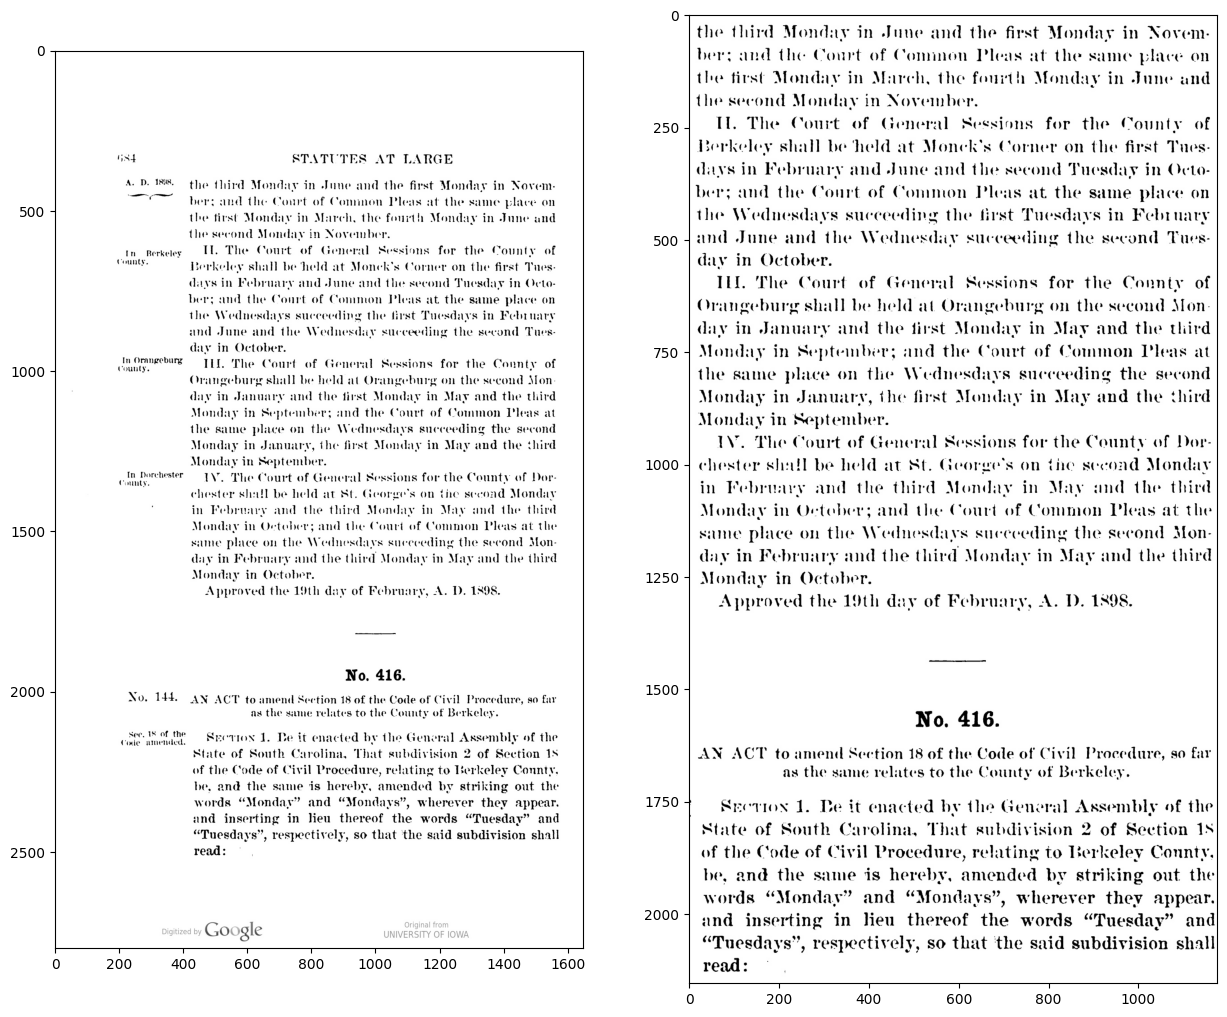

In [23]:
errorList = []  # will contain the list of all the file paths which throw errors
errorPath = ''
freq = 0
while True:
    freq += 1
    # Do make sure that the sample_csv.csv has been deleted (or is empty)
    # Because the method below will append to the csv if it already exists
    errorPath = crop2csv(sample, dil_iter=24)
    
    if (errorPath != ''):
        errorPathIndex = sample.index(errorPath)
        sample = sample[errorPathIndex+1:]
        errorList += [errorPath]
    else:
        break

In [24]:
# Read the csv and removed the unwanted header information lines
df = pd.read_csv('sample_csv.csv')
df = df.drop(df[df.path == 'path'].index)

csvPath = './' + year + '.csv'
df.to_csv(csvPath, index_label=False, index=False)

os.remove('sample_csv.csv')

In [25]:
# Create a dictionary of the errorList values
errorDict = {
    'year': int(year),
    'errorpaths':errorList}
errorDict

{'year': 1898, 'errorpaths': []}

In [26]:
# import os.path

# convert the dictionary to a dataframe
df_errors = pd.DataFrame.from_dict(errorDict)

# if the file already exists, then just append to it without the header
if (os.path.isfile('errors.csv')):
    df_errors.to_csv(r'errors.csv', index = False, header = False, mode='a')
else:
    df_errors.to_csv(r'errors.csv', index = False, header = True)